In [338]:
import random
import matplotlib.pyplot as plt
import sys
random.seed(14)

In [339]:
# Data
zero1 = [[1, 1], [1, 1]]
zero2 = [[0, 0], [0, 0]]

one1 = [[0, 1], [0, 1]]
one2 = [[1, 0], [1, 0]]
one3 = [[1, 1], [0, 0]]
one4 = [[0, 0], [1, 1]]

ones = [one1, one2, one3, one4]
zeros = [zero1, zero2]

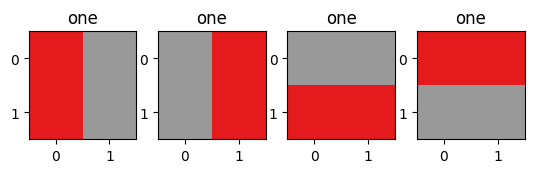

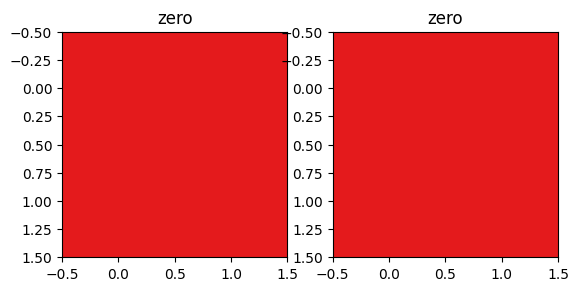

In [340]:
# Plot data
f, ax = plt.subplots(1,len(ones))
for i, one in enumerate(ones):
    ax[i].set_title("one")
    ax[i].imshow(one, cmap='Set1',  interpolation='nearest')


f, ax = plt.subplots(1,len(zeros))
for i, zero in enumerate(zeros):
    ax[i].set_title("zero")
    ax[i].imshow(zero, cmap='Set1',  interpolation='nearest')

In [341]:
# Reformat data for ANN 

def flatten(l):
    """"
    makes a 2d list into a 1d list
    for example:
    [[1, 2], [3, 4]] -> [1, 2, 3, 4]
    """
    return [item for sublist in l for item in sublist]

ones = [flatten(one) for one in ones] # make it easier for ANN
zeros = [flatten(zero) for zero in zeros]

In [342]:
# What a neuron is
class Neuron():
    def __init__(self,weights_count):
        self.weights = [random.uniform(-1,1) for _ in range(weights_count)]
        self.bias = 0

    def __call__(self, inputs):
        res = self.bias

        for index in range(len(self.weights)):
            res += self.weights[index] * inputs[index]
        return res

In [343]:
# ANN with 4 inputs,  3 hidden neurons and 1 output neuron

input_size = 4
hidden_size = 3
output_size = 1

hidden_layer = [Neuron(input_size) for _ in range(hidden_size)] # 3 neurons with 4 weights each

output_layer = [Neuron(hidden_size) for _ in range(output_size)] # 1 neurons with 3 weights

# Plot layers
print("The ANN looks like this:\n")
for _ in range(input_size):
    print("I   ", end="")
print("")
print(" "*2, end="")
for _ in range(hidden_size):
    print("O   ", end="")
print("")
print(" "*6, end="")
for _ in range(output_size):
    print("O   ", end="")

The ANN looks like this:

I   I   I   I   
  O   O   O   
      O   

In [344]:
# Lets test against a one
input = ones[0]
print(f"Input: {input}")

hidden_layer_pass = [neuron(input) for neuron in hidden_layer] # this will make the __call__ for each neuron calculating the results
print(f"Hidden layer pass: {hidden_layer_pass}")

output_layer_pass = [neuron(hidden_layer_pass) for neuron in output_layer]
print(f"Output layer pass: {output_layer_pass}")
prediction = 0 if output_layer_pass[0] < 0.5 else 1 # Simplify prediction

# We decide the first neuron = 0 and the second = 1
print(f"The ANN predicts this is a: {prediction}, and the truth is this is a 1.")
print(f"We need to train the ANN with backpropragation.")

Input: [0, 1, 0, 1]
Hidden layer pass: [1.2858758271059467, -0.17154893665377013, 0.9234994319341356]
Output layer pass: [-0.14493286624670665]
The ANN predicts this is a: 0, and the truth is this is a 0.
We need to train the ANN with backpropragation.


In [350]:
# Lets find out how wrong we were using Mean Squared Error (MSE)
def loss(predicted, actual):
    difference = predicted - actual
    squared_difference = difference ** 2 # square to get a positive diference
    return squared_difference

print(f"We predicted {output_layer_pass[0]} and the actual value is 1. The loss is: {loss(output_layer_pass[0], 1)}")


We predicted -0.14493286624670665 and the actual value is 1. The loss is: 1.310871268211899


In [353]:
# Backpropragation
lr = 0.01 # learning rate

d_lossBYd_pred = 2*(loss(output_layer_pass[0], 1))
print(f"d_lossBYd_pred: {d_lossBYd_pred}")

d_predBYd_output_weights = output_layer_pass[0]
print(f"d_predBYd_output_weights: {d_predBYd_output_weights}")

"""
# Forward pass
x = [0.1, 0.2, 0.3, 0.4] # example input
y_true = 0.5 # example label

hidden_outputs = [neuron(x) for neuron in hidden_layer]
y_pred = [neuron(hidden_outputs) for neuron in output_layer]

# Compute the loss
loss = (y_pred[0] - y_true)**2

# Backward pass
d_loss_d_pred = 2*(y_pred[0] - y_true) # Derivative of MSE w.r.t y_pred
d_pred_d_output_weights = hidden_outputs # Derivative of output w.r.t output weights
d_pred_d_hidden_outputs = [output_layer[0].weights[i] for i in range(hidden_size)] # Derivative of output w.r.t hidden layer outputs
d_hidden_outputs_d_hidden_weights = x # Derivative of hidden layer outputs w.r.t hidden layer weights

d_loss_d_output_weights = [d_loss_d_pred*d_pred_d_output_weights[i] for i in range(hidden_size)] # Derivative of loss w.r.t output weights
d_loss_d_hidden_outputs = [d_loss_d_pred*d_pred_d_hidden_outputs[i] for i in range(hidden_size)] # Derivative of loss w.r.t hidden layer outputs
d_loss_d_hidden_weights = [d_loss_d_hidden_outputs[i]*hidden_outputs[i]*(1-hidden_outputs[i])*d_hidden_outputs_d_hidden_weights[j] for j in range(input_size) for i in range(hidden_size)] # Derivative of loss w.r.t hidden layer weights

# Update weights and biases
for i in range(output_size):
    for j in range(hidden_size):
        output_layer[i].weights[j] -= learning_rate*d_loss_d_output_weights[j]
    output_layer[i].bias -= learning_rate*d_loss_d_pred
    
for i in range(hidden_size):
    for j in range(input_size):
        hidden_layer[i].weights[j] -= learning_rate*d_loss_d_hidden_weights[j*hidden_size+i]
    hidden_layer[i].bias -= learning_rate*d_loss_d_hidden_outputs[i]
"""

d_lossBYd_pred: 2.621742536423798
d_predBYd_output_weights: -0.14493286624670665


''